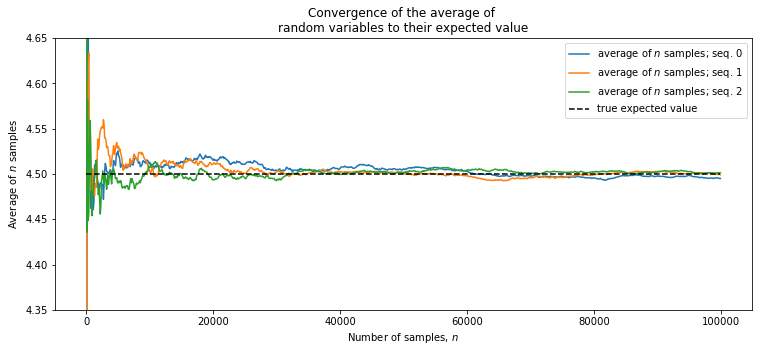

In [2]:
import pymc as pm
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

%matplotlib inline
figsize(12.5, 5)

sample_size = 100000

expected_value = lambda_ = 4.5
poi = pm.rpoisson
N_samples = range(1, sample_size, 100)

for k in range(3):
    samples = poi(lambda_, size=sample_size)
    partial_average = [samples[:i].mean() for i in N_samples]
    plt.plot(N_samples, partial_average, lw=1.5, 
             label="average of $n$ samples; seq. %d" %k)
    
plt.plot(N_samples, expected_value * np.ones_like(partial_average), ls="--", c="k",
        label="true expected value")    
plt.ylim(4.35, 4.65)
plt.ylabel("Average of $n$ samples")
plt.xlabel("Number of samples, $n$")
plt.title("Convergence of the average of \n"
         "random variables to their expected value")
plt.legend()

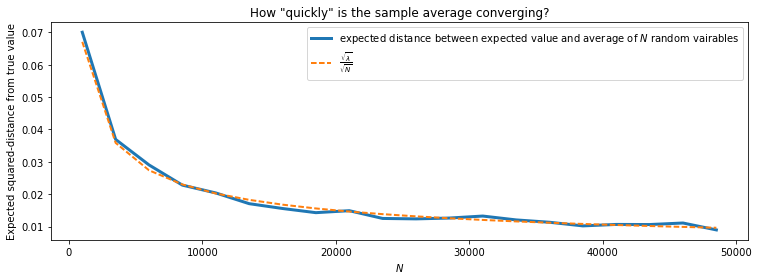

In [3]:
figsize(12.5, 4)

N_Y = 250

N_array = np.arange(1000, 50000, 2500)
D_N_results = np.zeros(len(N_array))
lambda_ = 4.5
expected_value = lambda_

def D_N(n):
    Z = poi(lambda_, size=(n, N_Y))
    average_Z = Z.mean(axis=0)
    return np.sqrt(((average_Z - expected_value)**2).mean())

for i, n in enumerate(N_array):
    D_N_results[i] = D_N(n)
    
plt.plot(N_array, D_N_results, lw=3,
        label="expected distance between expected value and average of $N$ random vairables")
plt.plot(N_array, np.sqrt(expected_value) / np.sqrt(N_array),
        lw=2, ls="--",
         label=r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$")
plt.legend()
plt.xlabel("$N$")
plt.ylabel("Expected squared-distance from true value")
plt.title('How "quickly" is the sample average converging?')


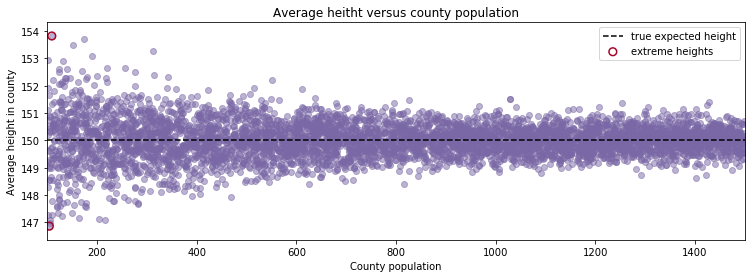

In [8]:
figsize(12.5, 4)
std_height = 15
mean_height = 150

n_counties =5000
pop_generator = pm.rdiscrete_uniform
norm = pm.rnormal

population = pop_generator(100, 1500, size=n_counties)

average_across_county = np.zeros(n_counties)
for i in range(n_counties):
    average_across_county[i] = norm(mean_height, 1./ std_height**2, 
                                    size=population[i]).mean()

i_min = np.argmin(average_across_county)
i_max = np.argmax(average_across_county)

plt.scatter(population, average_across_county,
           alpha=0.5, c="#7A68A6")
plt.scatter([population[i_min],population[i_max]],
           [average_across_county[i_min], average_across_county[i_max]],
           s=60, marker="o", facecolors="none",
           edgecolors="#A60628", linewidths=1.5,
           label="extreme heights")

plt.plot([100, 1500], [150, 150], color="k", ls="--",
        label="true expected height")

plt.xlim(100, 1500)
plt.title("Average heitht versus county population")
plt.xlabel("County population")
plt.ylabel("Average height in county")

plt.legend(scatterpoints=1)

In [9]:
print("Population sizes of 10 shotest countirs")
print(population[np.argsort(average_across_county)[:10]])
print("Population sizes of 10 tallest countris")
print(population[np.argsort(-average_across_county)[:10]])

Population sizes of 10 shotest countirs
[104 106 216 105 204 164 129 109 102 121]
Population sizes of 10 tallest countris
[109 173 151 312 190 101 131 220 256 139]


In [12]:
from os import makedirs
makedirs("data", exist_ok=True)
from urllib.request import urlretrieve
urlretrieve("https://git.io/vXtMv", "data/census_data.csv")

('data/census_data.csv', <http.client.HTTPMessage at 0x1033cd940>)

In [13]:
figsize(12.5, 6.5)
data = np.genfromtxt("data/census_data.csv", skip_header=1, delimiter=",")

plt.scatter(data[:,1], data[:,0], alpha=0.5, c="#7A68A6")

i_min = np.argmin(data[:,0])
i_max = np.argmax(data[:,0])
plt.scatter([data[i_min, 1], data[i_max, 1]],
            [data[i_min, 0], data[i_max, 1]],
           s=60, marker="o", facecolors="none",
           edgecolors = "#A60628", linewidths=1.5,
           label="most extreme points")

plt.title("Census mail-back rate versus population")
plt.ylabel("Mail-back rate")
plt.xlabel("Population of block group")
plt.xlim(-100, 15e3)
plt.ylim(-5, 105)
plt.legend(scatterpoints=1)






In [7]:
from os import makedirs
makedirs("data", exist_ok=True)

from urllib.request import urlretrieve
urlretrieve("https://git.io/vXtX2","top_showerthoughts_submissions.py")

import praw


In [9]:
%run top_showerthoughts_submissions.py 2

print("Title of submission:")
print(top_post)

Title of submission:
As a dude, I wish it were more acceptable to just hug people who aren't immediate family.


In [10]:
n_comments = len(contents)
comments = np.random.randint(n_comments, size=4)
print("Some Comments(out of %d total)" % n_comments)

for i in comments:
    print('"' + contents[i] + '"')
    print("upvotes/downvotes:", votes[i,:], "\n")

Some Comments(out of 98 total)
"Growing up, I expected it to be a much more common occurrence for neighbours to ask to borrow a cup of sugar."
upvotes/downvotes: [67  6] 

"I Just realized that loading bars in games have to be loaded before they can show how loaded it is."
upvotes/downvotes: [59  4] 

"If I'm not suppose to eat at night why is there a light bulb in my refrigerator."
upvotes/downvotes: [96 17] 

"How many extinct animals are just really good at hiding?"
upvotes/downvotes: [40  9] 



In [11]:
import pymc as pm

def posterior_upvote_ratio(upvotes, downvotes, samples=20000):
    N = upvotes + downvotes
    upvote_ratio = pm.Uniform("upvote_ratio", 0, 1)
    observations = pm.Binomial("obs", N, upvote_ratio, value=upvotes, observed=True)
    map_ = pm.MAP([upvote_ratio, observations]).fit()
    mcmc = pm.MCMC([upvote_ratio, observations])
    mcmc.sample(samples, samples/4)
    return mcmc.trace("upvote_ratio")[:]

 [-----------------100%-----------------] 20000 of 20000 complete in 0.7 sec

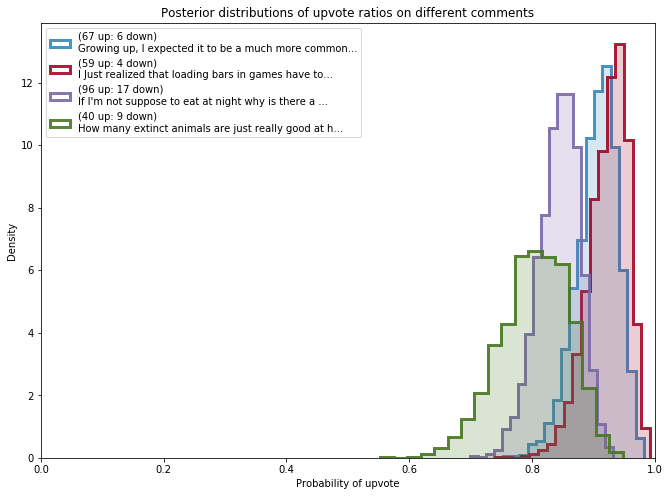

In [12]:
figsize(11., 8)
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457"]

posteriors = []
for i in range(len(comments)):
    j = comments[i]
    label ='(%d up: %d down)\n%s...' % (votes[j, 0], votes[j, 1], contents[j][:50])
    posteriors.append(posterior_upvote_ratio(votes[j, 0], votes[j, 1]))
    plt.hist(posteriors[i], bins=18, normed=True, alpha = .9,
            histtype="step", color=colors[i % 5], lw=3, label=label)
    plt.hist(posteriors[i], bins=18, normed=True, alpha=.2,
            histtype="stepfilled", color=colors[i], lw=3)
    
plt.legend(loc="upper left")
plt.xlim(0, 1)
plt.ylabel("Density")
plt.xlabel("Probability of upvote")
plt.title("Posterior distributions of upvote ratios on different comments")


In [15]:
N = posteriors[0].shape[0]
lower_limits = []

for i in range(len(comments)):
    j = comments[i]
    label = '(%d up:%d down)\n%s...' % (votes[j, 0], votes[j, 1], contents[j][:50])
    plt.hist(posteriors[i], bins=20, normed=True, alpha=.9, histtype="step", color=colors[i], lw=3, label=label)
    plt.hist(posteriors[i], bins=20, normed=True, alpha=.2, histtype="stepfilled", color=colors[i], lw=3)
    v = np.sort(posteriors[i])[int(0.05 * N)]
    plt.vlines(v, 0, 10, colors=colors[i], linestyles='--', linewidths=3)
    lower_limits.append(v)
    
plt.legend(loc="upper left")
plt.xlabel("Probability of upvote")
plt.ylabel("Density")
plt.title("Posterior distributions of upvote ratios on different comments")

order = np.argsort(-np.array(lower_limits))
print(order, lower_limits)
    

[1 0 2 3] [0.843622709711084, 0.86461895496961028, 0.78428174645757454, 0.70535007284304696]


In [16]:
def intervals(u, d):
    a = 1. + u
    b = 1. + d
    mu = a / (a + b)
    std_err = 1.65 * np.sqrt((a * b) / ((a + b)**2 * (a + b + 1.)))
    return(mu, std_err)

posterior_mean, std_err = intervals(votes[:, 0], votes[:, 1])
lb = posterior_mean - std_err

print("Approximate lower bounds:\n", lb, "\n")
print("Top 40 sorted according to approimate lower bounds:\n")

order = np.argsort(-lb)
ordered_contents = []
for i in order[:40]:
    ordered_contents.append(contents[i])
    print(votes[i, 0], votes[i, 1], contents[i])
    print("----------")

Approximate lower bounds:
 [ 0.96470374  0.92276095  0.92186102  0.94149163  0.9195263   0.92898177
  0.96155721  0.94012174  0.92842391  0.92703421  0.90510534  0.95924291
  0.93013353  0.93190346  0.90666421  0.91778149  0.88362706  0.89465172
  0.88252422  0.91650031  0.84908233  0.88972509  0.89799144  0.89486509
  0.9058939   0.89429145  0.91431808  0.79431186  0.8339938   0.86846888
  0.76165763  0.91361467  0.91423436  0.79562257  0.84875395  0.83564692
  0.84646012  0.88470605  0.80109456  0.85500865  0.78781364  0.85444435
  0.79228647  0.74963326  0.85291075  0.87312876  0.79570818  0.79729773
  0.86165674  0.86483324  0.84142142  0.84298539  0.81715738  0.8143682
  0.82530625  0.67226122  0.83909857  0.8143682   0.85542404  0.8516088
  0.86895674  0.81835425  0.85747459  0.73647331  0.74403497  0.69502563
  0.85592918  0.7676102   0.86765877  0.79811635  0.83923494  0.84839412
  0.94061553  0.86005221  0.87279132  0.67067399  0.88733792  0.86765877
  0.65099638  0.86268299  

([<matplotlib.axis.YTick at 0x11907c668>,
 <a list of 40 Text yticklabel objects>)

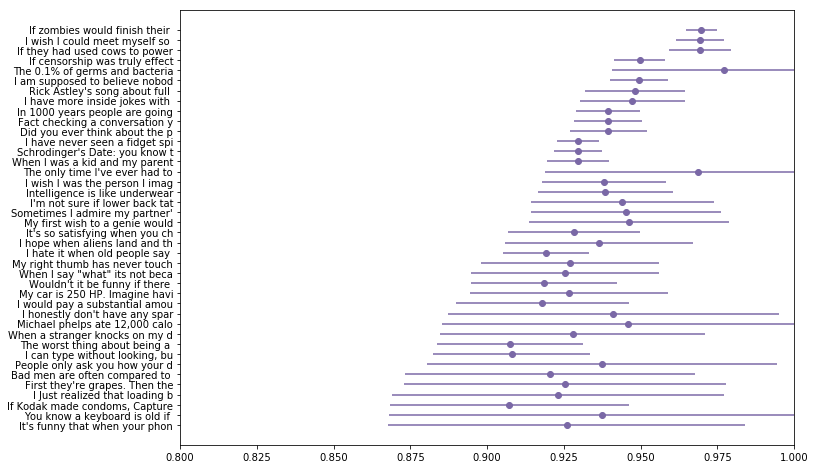

In [19]:
r_order = order[::-1][-40:]
plt.errorbar(posterior_mean[r_order], np.arange(len(r_order)),
            xerr = std_err[r_order],
            capsize=0, fmt="o", color="#7A68A6")
plt.xlim(0.8, 1)
plt.yticks(np.arange(len(r_order) - 1, -1, -1),
          map(lambda x: x[:30].replace("\n", ""), ordered_contents))